## Task 1: Prediction using Supervised Machine Learning
### Name: Annan Dejene Deriba

- The provided dataset contains the # of hours a given student studied and the score that student got.
- The task will be to make a model on the data and given the number of hours we can predict the score that student can get. Since there is one independent variable Simple Linear Regression will be used.

> Simple Linear Regression is a linear regression model with a single explanatory variable. That is, it concerns two-dimensional sample points with one independent variable and one dependent variable and finds a linear function that, as accurately as possible, predicts the dependent variable values as a function of the independent variable.

- The formula for simple Linear Regression is:

$y = mX + \beta_0 $

- $y$ -- the dependent variable (the one we're trying to predict)
- $X$ -- the independent variable (the one we're using as a predictor for y)
- $\beta_0 $ -- the intercept
- $m$ -- the coefficient of $X$; it tells us how much y will change for a unit change in x

- $m$ and $\beta_0$ are the model coefficients, this values are learned during the model fitting process.

In [1]:
# Importing neccessary libraries for doing the task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset from the given url
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploring our data

In [3]:
# To get the shape of our data
data.shape

(25, 2)

In [4]:
# To see how many null values exist in our dataset
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# To get a brief statistical description of our data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


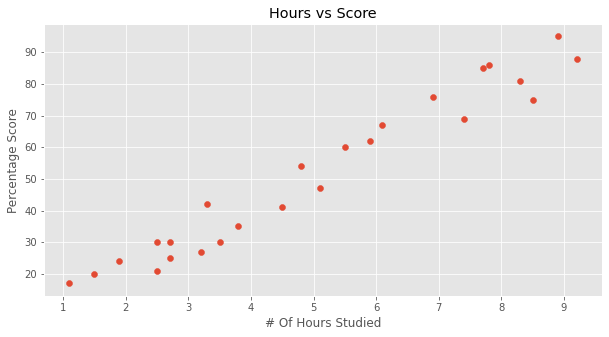

In [6]:
# Let's make a scatter plot of Hours vs Scores
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = 10, 5

plt.scatter(data=data, x="Hours", y="Scores")

plt.title("Hours vs Score")
plt.xlabel("# Of Hours Studied")
plt.ylabel("Percentage Score");

- **We can see that there is a very high positive linear relationship between the # of Hours Studied and the students score.**

### Data Preparation

- We will now prepare the data we will train our model on.

In [7]:
# Splitting our data to independent variable "X" (Hours) and dependent variable "y" (Scores)
X = data["Hours"].values.reshape(-1,1)
y = data["Scores"].values.reshape(-1,1)

In [8]:
# Now we have our X and y we will do train/test split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

### Training our model


In [9]:
from sklearn.linear_model import LinearRegression  
lin_reg = LinearRegression()  
lin_reg.fit(X_train, y_train) 

LinearRegression()

In [10]:
m = lin_reg.coef_
b = lin_reg.intercept_
m, b

(array([[9.68207815]]), array([2.82689235]))

- The formula of the simple Linear Regression in this case will be:

$Score = 9.8*Hour + 2.5$

- $Score$ -- the dependent variable (the one we're trying to predict)
- $Hour$ -- the independent variable (the one we're using as a predictor for Score)
- $\beta_0 $=2.5 -- the intercept; it says that if hours studied is 0 then the Score for that student will be 2.5.
- $m$=9.8 -- the slope; it says that for a unit increase in an hour of study the score will go up by 9.8 percentage.

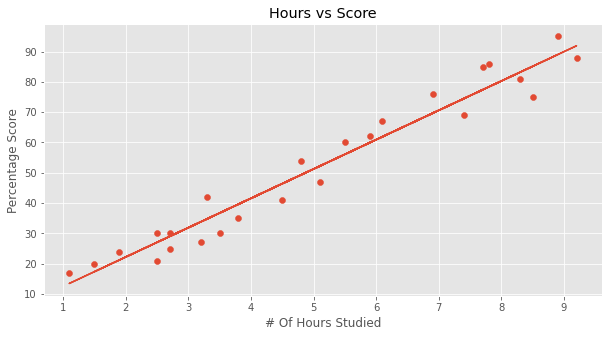

In [11]:
# Let's plot the predicted best fit line (regression line)
m = lin_reg.coef_
b = lin_reg.intercept_

plt.scatter(X, y)
plt.plot(X, m*X+b)

plt.title("Hours vs Score")
plt.xlabel("# Of Hours Studied")
plt.ylabel("Percentage Score");

### Evaluating the trained model

In [12]:
y_pred = lin_reg.predict(X_test)
y_pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [13]:
y_test

array([[81],
       [30],
       [21],
       [76],
       [62]], dtype=int64)

In [14]:
# We will use RMSE (Root Mean Squared Error) as an error metric 
from sklearn.metrics import mean_squared_error as mse
print("Root Mean Squared Error:", np.sqrt(mse(y_test, y_pred)))

Root Mean Squared Error: 4.352380006653288


### Training our model on the whole dataset

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

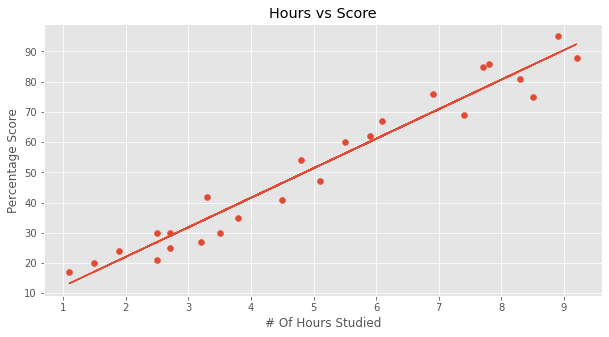

In [16]:
# Let's plot the predicted best fit line (regression line)
m = lin_reg.coef_
b = lin_reg.intercept_

plt.scatter(X, y)
plt.plot(X, m*X+b)

plt.title("Hours vs Score")
plt.xlabel("# Of Hours Studied")
plt.ylabel("Percentage Score");

### Predict the score a student will get given the # of hours that student studied for

In [17]:
def score_predictor(hours):
    """
    Given the number of hours studied this function will predict the Score you will get.
    
    input
    hours -- The number of hours you studied, it should be numerical 
    
    output
    score -- The score in percentage out of 100
    """
    m = lin_reg.coef_
    b = lin_reg.intercept_
    try: 
        hrs = float(hours)
        hrs = np.array(hrs).reshape(-1,1)
        score = np.round(m*hrs + b, 2)
        score = 0 if score<0 else score
        score = 100 if score>100 else score 
        print(f"You have studied for {float(hrs)}hrs and it's predicted that you will get a Score of {float(score)}.")
    except:
        print("Enter a valid number!")

In [18]:
score_predictor(hours=9.25)

You have studied for 9.25hrs and it's predicted that you will get a Score of 92.91.
